In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes=pd.read_csv('data/diabete_data.csv')
diabetes

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_catg
0,2278392,8222157,Caucasian,Female,u,u,r,1,41,0,...,No,No,No,No,No,No,No,No,NO,1.0
1,149190,55629189,Caucasian,Female,k,d,o,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,>30,1.0
2,64410,86047875,AfricanAmerican,Female,k,d,o,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,1.0
3,500364,82442376,Caucasian,Male,k,d,o,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,1.0
4,16680,42519267,Caucasian,Male,k,d,o,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100106,443847548,100162476,AfricanAmerican,Male,k,d,o,3,51,0,...,Down,No,No,No,No,No,Ch,Yes,>30,1.5
100107,443847782,74694222,AfricanAmerican,Female,k,d,t,5,33,3,...,Steady,No,No,No,No,No,No,Yes,NO,2.0
100108,443854148,41088789,Caucasian,Male,k,d,o,1,53,0,...,Down,No,No,No,No,No,Ch,Yes,NO,1.5
100109,443857166,31693671,Caucasian,Female,k,d,o,10,45,2,...,Up,No,No,No,No,No,Ch,Yes,NO,2.0


### Data Preprocessing

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100111 entries, 0 to 100110
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              100111 non-null  int64  
 1   patient_nbr               100111 non-null  int64  
 2   race                      100111 non-null  object 
 3   gender                    100111 non-null  object 
 4   admission_type_id         100111 non-null  object 
 5   discharge_disposition_id  100111 non-null  object 
 6   admission_source_id       100111 non-null  object 
 7   time_in_hospital          100111 non-null  int64  
 8   num_lab_procedures        100111 non-null  int64  
 9   num_procedures            100111 non-null  int64  
 10  num_medications           100111 non-null  int64  
 11  number_outpatient         100111 non-null  int64  
 12  number_emergency          100111 non-null  int64  
 13  number_inpatient          100111 non-null  i

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
def readmit(c):
  if c['readmitted']=='<30':
    return 1
  else:
    return 0

diabetes['readmitted'] = diabetes.apply(readmit, axis = 1)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100111 entries, 0 to 100110
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              100111 non-null  int64  
 1   patient_nbr               100111 non-null  int64  
 2   race                      100111 non-null  object 
 3   gender                    100111 non-null  object 
 4   admission_type_id         100111 non-null  object 
 5   discharge_disposition_id  100111 non-null  object 
 6   admission_source_id       100111 non-null  object 
 7   time_in_hospital          100111 non-null  int64  
 8   num_lab_procedures        100111 non-null  int64  
 9   num_procedures            100111 non-null  int64  
 10  num_medications           100111 non-null  int64  
 11  number_outpatient         100111 non-null  int64  
 12  number_emergency          100111 non-null  int64  
 13  number_inpatient          100111 non-null  i

In [7]:
diabetes=diabetes.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1)

In [8]:
dummy_race=pd.get_dummies(diabetes['race'],drop_first=False, prefix='r', dtype='int')
diabetes= pd.concat([diabetes, dummy_race], axis=1)

dummy_gender=pd.get_dummies(diabetes['gender'],drop_first=False, prefix='g', dtype='int')
diabetes= pd.concat([diabetes, dummy_gender], axis=1)

dummy_d2=pd.get_dummies(diabetes['diag_2'],drop_first=False, prefix='d2', dtype='int')
diabetes= pd.concat([diabetes, dummy_d2], axis=1)

dummy_d3=pd.get_dummies(diabetes['diag_3'],drop_first=False, prefix='d3', dtype='int')
diabetes= pd.concat([diabetes, dummy_d3], axis=1)

diabetes

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,d2_Respiratory,d3_Circulatory,d3_Diabetes,d3_Digestive,d3_Genitourinary,d3_Injury,d3_Musculoskeletal,d3_Neoplasms,d3_Other,d3_Respiratory
0,Caucasian,Female,1,41,0,1,0,0,0,Diabetes,...,0,0,0,0,0,0,0,0,1,0
1,Caucasian,Female,3,59,0,18,0,0,0,Other,...,0,0,0,0,0,0,0,0,1,0
2,AfricanAmerican,Female,2,11,5,13,2,0,1,Other,...,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,2,44,1,16,0,0,0,Other,...,0,1,0,0,0,0,0,0,0,0
4,Caucasian,Male,1,51,0,8,0,0,0,Neoplasms,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100106,AfricanAmerican,Male,3,51,0,16,0,0,0,Diabetes,...,0,1,0,0,0,0,0,0,0,0
100107,AfricanAmerican,Female,5,33,3,18,0,0,1,Digestive,...,0,0,0,1,0,0,0,0,0,0
100108,Caucasian,Male,1,53,0,9,1,0,0,Other,...,0,0,0,0,0,0,0,0,1,0
100109,Caucasian,Female,10,45,2,21,0,0,1,Injury,...,0,0,0,0,0,1,0,0,0,0


In [9]:
def glucose(g):
  if g['max_glu_serum']=='Norm':
    return 1
  elif g['max_glu_serum']=='>200':
    return 2
  elif g['max_glu_serum']=='>300':
    return 3
  else:
    return 0

diabetes['max_glu_serum'] = diabetes.apply(glucose, axis = 1)

In [10]:
def aonec(a):
  if a['A1Cresult']=='Norm':
    return 1
  elif a['A1Cresult']=='>7':
    return 2
  elif a['A1Cresult']=='>8':
    return 3
  else:
    return 0

diabetes['A1Cresult'] = diabetes.apply(aonec, axis = 1)

In [11]:
dummy_met=pd.get_dummies(diabetes['metformin'],drop_first=False, prefix='meta', dtype='int')
diabetes= pd.concat([diabetes, dummy_met], axis=1)

dummy_rep=pd.get_dummies(diabetes['repaglinide'],drop_first=False, prefix='rep', dtype='int')
diabetes= pd.concat([diabetes, dummy_rep], axis=1)

dummy_nat=pd.get_dummies(diabetes['nateglinide'],drop_first=False, prefix='nat', dtype='int')
diabetes= pd.concat([diabetes, dummy_nat], axis=1)

dummy_chlo=pd.get_dummies(diabetes['chlorpropamide'],drop_first=False, prefix='chlo', dtype='int')
diabetes= pd.concat([diabetes, dummy_chlo], axis=1)

dummy_glim=pd.get_dummies(diabetes['glimepiride'],drop_first=False, prefix='glim', dtype='int')
diabetes= pd.concat([diabetes, dummy_glim], axis=1)

dummy_ace=pd.get_dummies(diabetes['acetohexamide'],drop_first=False, prefix='ace', dtype='int')
diabetes= pd.concat([diabetes, dummy_ace], axis=1)

dummy_glip=pd.get_dummies(diabetes['glipizide'],drop_first=False, prefix='glip', dtype='int')
diabetes= pd.concat([diabetes, dummy_glip], axis=1)

dummy_gly=pd.get_dummies(diabetes['glyburide'],drop_first=False, prefix='gly', dtype='int')
diabetes= pd.concat([diabetes, dummy_gly], axis=1)

dummy_tol=pd.get_dummies(diabetes['tolbutamide'],drop_first=False, prefix='tol', dtype='int')
diabetes= pd.concat([diabetes, dummy_tol], axis=1)

dummy_pio=pd.get_dummies(diabetes['pioglitazone'],drop_first=False, prefix='pio', dtype='int')
diabetes= pd.concat([diabetes, dummy_pio], axis=1)

dummy_ros=pd.get_dummies(diabetes['rosiglitazone'],drop_first=False, prefix='ros', dtype='int')
diabetes= pd.concat([diabetes, dummy_ros], axis=1)

dummy_acar=pd.get_dummies(diabetes['acarbose'],drop_first=False, prefix='aca', dtype='int')
diabetes= pd.concat([diabetes, dummy_acar], axis=1)

dummy_mig=pd.get_dummies(diabetes['miglitol'],drop_first=False, prefix='mig', dtype='int')
diabetes= pd.concat([diabetes, dummy_mig], axis=1)

dummy_tro=pd.get_dummies(diabetes['troglitazone'],drop_first=False, prefix='tro', dtype='int')
diabetes= pd.concat([diabetes, dummy_tro], axis=1)

dummy_tolz=pd.get_dummies(diabetes['tolazamide'],drop_first=False, prefix='tolz', dtype='int')
diabetes= pd.concat([diabetes, dummy_tolz], axis=1)

dummy_in=pd.get_dummies(diabetes['insulin'],drop_first=False, prefix='in', dtype='int')
diabetes= pd.concat([diabetes, dummy_in], axis=1)

dummy_bur=pd.get_dummies(diabetes['glyburide-metformin'],drop_first=False, prefix='bur', dtype='int')
diabetes= pd.concat([diabetes, dummy_bur], axis=1)

dummy_liz=pd.get_dummies(diabetes['glipizide-metformin'],drop_first=False, prefix='liz', dtype='int')
diabetes= pd.concat([diabetes, dummy_liz], axis=1)

dummy_glip=pd.get_dummies(diabetes['glimepiride-pioglitazone'],drop_first=False, prefix='glip', dtype='int')
diabetes= pd.concat([diabetes, dummy_glip], axis=1)

dummy_ros=pd.get_dummies(diabetes['metformin-rosiglitazone'],drop_first=False, prefix='ros', dtype='int')
diabetes= pd.concat([diabetes, dummy_ros], axis=1)

dummy_pio=pd.get_dummies(diabetes['metformin-pioglitazone'],drop_first=False, prefix='pio', dtype='int')
diabetes= pd.concat([diabetes, dummy_pio], axis=1)

dummy_ch=pd.get_dummies(diabetes['change'],drop_first=False, prefix='ch', dtype='int')
diabetes= pd.concat([diabetes, dummy_ch], axis=1)

dummy_meds=pd.get_dummies(diabetes['diabetesMed'],drop_first=False, prefix='meds', dtype='int')
diabetes= pd.concat([diabetes, dummy_meds], axis=1)

dummy_meds=pd.get_dummies(diabetes['diabetesMed'],drop_first=False, prefix='meds', dtype='int')
diabetes= pd.concat([diabetes, dummy_meds], axis=1)

diabetes

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,ros_No,ros_Steady,pio_No,pio_Steady,ch_Ch,ch_No,meds_No,meds_Yes,meds_No,meds_Yes
0,Caucasian,Female,1,41,0,1,0,0,0,Diabetes,...,1,0,1,0,0,1,1,0,1,0
1,Caucasian,Female,3,59,0,18,0,0,0,Other,...,1,0,1,0,1,0,0,1,0,1
2,AfricanAmerican,Female,2,11,5,13,2,0,1,Other,...,1,0,1,0,0,1,0,1,0,1
3,Caucasian,Male,2,44,1,16,0,0,0,Other,...,1,0,1,0,1,0,0,1,0,1
4,Caucasian,Male,1,51,0,8,0,0,0,Neoplasms,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100106,AfricanAmerican,Male,3,51,0,16,0,0,0,Diabetes,...,1,0,1,0,1,0,0,1,0,1
100107,AfricanAmerican,Female,5,33,3,18,0,0,1,Digestive,...,1,0,1,0,0,1,0,1,0,1
100108,Caucasian,Male,1,53,0,9,1,0,0,Other,...,1,0,1,0,1,0,0,1,0,1
100109,Caucasian,Female,10,45,2,21,0,0,1,Injury,...,1,0,1,0,1,0,0,1,0,1


### Lasso Regression

In [12]:
from sklearn.model_selection import train_test_split

X= diabetes.drop(['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide','glipizide', 'glyburide','tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','change', 'diabetesMed' ], axis=1)
y =diabetes['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6500)

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_squared_error

In [14]:
lasso = Lasso(alpha = 0.1, fit_intercept =True)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [15]:
lasso_pred_on_test = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test,lasso_pred_on_test)
print(lasso_mse)

0.10098787362809797


In [16]:
lasso.score(X_train,y_train)

0.004217825005001008

In [17]:
lasso.score(X_test,y_test)

0.00424275770510163

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [19]:
lasso_s = Lasso(alpha=0.1, fit_intercept=True)
lasso_s.fit(X_train_scaled, y_train)

lasso_s_pred_on_test = lasso_s.predict(X_test_scaled)
lasso_s_mse = mean_squared_error(y_test,lasso_s_pred_on_test)
print(lasso_s_mse)

0.010120583266887308


In [20]:
print(lasso_s.score(X_train_scaled,y_train))

0.9002117624922177


In [21]:
print(lasso_s.score(X_test_scaled,y_test))

0.9002093645286172


In [22]:
from sklearn.pipeline import Pipeline

lasso_model = Pipeline([ ('scaler',StandardScaler()), ('Lasso', Lasso(fit_intercept=True))  ])
cv_method = RepeatedKFold(n_splits=10, n_repeats=5, random_state=6500)
pipe_params = {'Lasso__alpha': 10**np.linspace(-8,0,9)}
search = GridSearchCV(lasso_model, pipe_params, scoring='neg_mean_squared_error',
                     cv=cv_method, n_jobs=-1, verbose=False)
search_results = search.fit(X_train,y_train)

In [23]:
search_results.cv_results_

{'mean_fit_time': array([0.54959177, 0.46210518, 0.45704608, 0.51623292, 0.62670052,
        0.44209155, 0.56957816, 0.52756179, 0.45650174]),
 'std_fit_time': array([0.16635013, 0.05838579, 0.0583926 , 0.07603864, 0.16319661,
        0.07982904, 0.18437266, 0.12321388, 0.0952845 ]),
 'mean_score_time': array([0.03215472, 0.03496808, 0.03763922, 0.03927686, 0.03779292,
        0.03253065, 0.04655551, 0.03451519, 0.02703262]),
 'std_score_time': array([0.01466134, 0.01122889, 0.01961498, 0.01680315, 0.01369674,
        0.01215848, 0.02061361, 0.01284332, 0.00803844]),
 'param_Lasso__alpha': masked_array(data=[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                    1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'Lasso__alpha': 1e-08},
  {'Lasso__alpha': 1e-07},
  {'Lasso__alpha': 1e-06},
  {'Lasso__alpha': 1e-05},
  {'Lasso__alpha': 0.0001},
  

In [24]:
print('The best parameter %s' %search_results.best_params_ )
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

The best parameter {'Lasso__alpha': 1e-05}
Best Value for Scoring Method: -0.00000


In [25]:
search_results.cv_results_['mean_test_score']

array([-4.19128059e-09, -4.01370861e-09, -2.72336257e-09, -1.04445394e-10,
       -1.00010371e-08, -1.00010371e-06, -1.00010371e-04, -1.00010371e-02,
       -1.00214715e-01])

<Axes: >

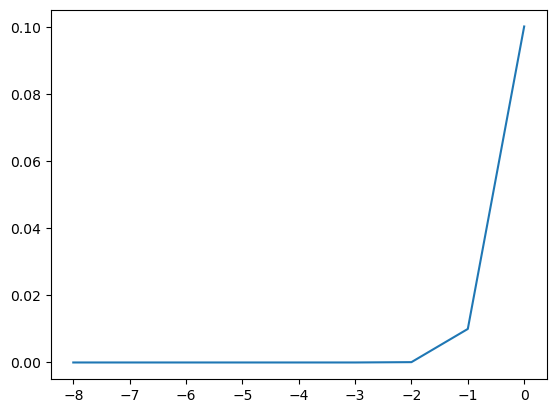

In [26]:
sns.lineplot(x=np.log10(pipe_params['Lasso__alpha']), y=-search_results.cv_results_['mean_test_score'])

In [27]:
lasso_mincv= min(-search_results.cv_results_['mean_test_score'])
lasso_mincv

1.0444539363545582e-10

In [28]:
search_results.best_params_

{'Lasso__alpha': 1e-05}

In [29]:
alpha_opt = search_results.best_params_['Lasso__alpha']
lasso_opt = Pipeline([ ('scaler',StandardScaler()), ('Lasso', Lasso(alpha=alpha_opt,fit_intercept=True))  ])
lasso_opt.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('Lasso', Lasso(alpha=1e-05))])

In [30]:
lasso_opt_pred_on_test = lasso_opt.predict(X_test)
lasso_opt_mse = mean_squared_error(y_test,lasso_opt_pred_on_test)
print(lasso_opt_mse)

1.0120582980090635e-10


In [31]:
lasso_opt_R2_test = lasso_opt.score(X_test,y_test)
lasso_opt_R2_test

0.9999999990020937

In [32]:
lasso_opt.named_steps['Lasso'].coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.31655312,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.  

In [33]:
lasso.coef_

array([ 0.00000000e+00,  3.81771989e-05, -0.00000000e+00,  8.45554154e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.98192456e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [34]:
df_lasso = pd.DataFrame(lasso.coef_)

In [35]:
names = pd.DataFrame(list(X.columns))
df_lasso = pd.concat([names, df_lasso], axis = 1)
df_lasso.head()

,0,0
0,time_in_hospital,0.000000
1,num_lab_procedures,0.000038
2,num_procedures,-0.000000
3,num_medications,0.000085
4,number_outpatient,0.000000


In [36]:
df_lasso.columns = ['Feature', 'lasso_coeff_.1']
df_lasso = df_lasso.sort_values(by='lasso_coeff_.1', ascending = False)
df_lasso

,Feature,lasso_coeff_.1
10,readmitted,0.001982
3,num_medications,0.000085
1,num_lab_procedures,0.000038
0,time_in_hospital,0.000000
72,pio_Steady,-0.000000
...,...,...
35,d3_Neoplasms,0.000000
34,d3_Musculoskeletal,-0.000000
33,d3_Injury,0.000000
32,d3_Genitourinary,0.000000


In [37]:
## When considering what factors impact readmittion, we need to look at number of medications, time in hospital, and number of lab procedures

### Data Vizzes

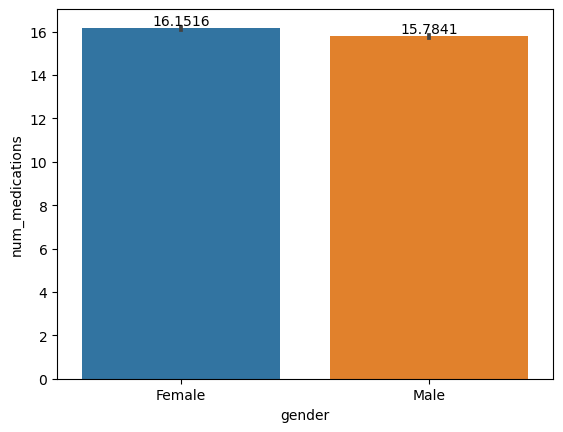

In [48]:
fig1= sns.barplot(diabetes, x='gender', y='num_medications')
for i in fig1.containers:
    fig1.bar_label(i,)

In [49]:
##more women are on medications than men. makes sense since women are not listened to a lot in healthcare

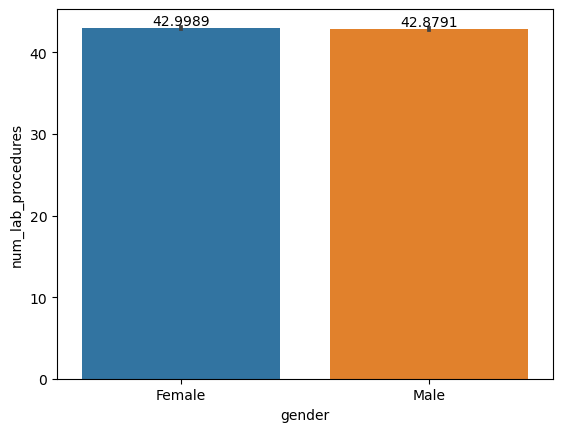

In [46]:
fig2=sns.barplot(diabetes,x='gender', y="num_lab_procedures")
for i in fig2.containers:
    fig2.bar_label(i,)

In [42]:
## women are tested for more than men are. this makes sense since women have more increased risk of different

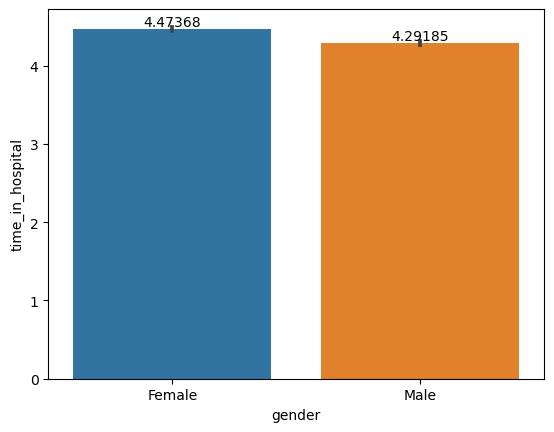

In [47]:
fig3=sns.barplot(diabetes,x='gender', y="time_in_hospital")
for i in fig3.containers:
    fig3.bar_label(i,)